# Customer Credit Solution
This notebook aims to make sure that the customers are given the right amount of credit. Basic Energy Services is having a problem where it finds itself giving a lot of credit to its customers and the customers aren't paying Basic Energy Services back. This company hired Real AI Solutions to help fix the issue. In this notebook, we will be creating machine learning models to help fix the issue.

#Milestone 1
We first begin importing our necessary modules

###Importation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from scipy import stats
from sklearn.ensemble import RandomForestRegressor

###Loading Data

We then load the data and define the dataframes using pandas.

In [2]:
pd.set_option("display.max_columns", None)

Credit = pd.read_csv('Customer_Credit_Management_Master.csv')

Aging_df1 = pd.read_csv('ReceivableFromCustomer_Aging.csv')

Aging_df2 = pd.read_csv('ReceivableFromCustomer_AgingDataset2.csv')

/tmp/ipython-input-2-2470906549.py:5: DtypeWarning: Columns (0,1,13,16,18,25,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  Aging_df1 = pd.read_csv('ReceivableFromCustomer_Aging.csv')


###Combining like datsets

Knowing that Aging_df1 and Aging_df2 will be combined, lets first print the info for both to make sure that the columns are the same in both dataframes.

In [3]:
print("Aging_df1 dataset")
print("-------------------")
print(Aging_df1.info())

print()
print()

print("Aging_df2 dataset")
print("-------------------")
print(Aging_df2.info())

Aging_df1 dataset
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36052 entries, 0 to 36051
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Plant                            35149 non-null  object 
 1   Customer Number                  36051 non-null  object 
 2   Business Segment                 36050 non-null  object 
 3   State                            36049 non-null  object 
 4   Collector                        35994 non-null  object 
 5   Lease state                      20882 non-null  object 
 6   Last Ticket Date                 20882 non-null  object 
 7   Document No                      36051 non-null  float64
 8   Company Code                     36051 non-null  float64
 9   Year                             36051 non-null  float64
 10  Cleared Doc                      6669 non-null   float64
 11  Ref Doc                          36051 non

Notice how the Lease country column is in Aging_df2 but not in Aging_df1. Since Lease country is, moreover, insignificant to this project, and we do need to combine both datasets with like columns, lets go ahead and drop it.

In [4]:
#Notice how Lease Country column is in Aging_df2 but not in Aging_df1
Aging_df2.drop(["Lease country"], axis = 1, inplace=True)

###We verify before combining datasets

Lets combine Aging_df1 and Aging_df2 into one dataframe because Aging_df2 is an extension of Aging_df1. In order to make sure that the dataframes got concatenated correctly, we also print the info for the combined one.

In [5]:
Aging = pd.concat([Aging_df1,Aging_df2]).reset_index()

print(Aging.drop(["index"], axis = 1).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36890 entries, 0 to 36889
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Plant                            35833 non-null  object 
 1   Customer Number                  36888 non-null  object 
 2   Business Segment                 36887 non-null  object 
 3   State                            36886 non-null  object 
 4   Collector                        36831 non-null  object 
 5   Lease state                      21566 non-null  object 
 6   Last Ticket Date                 21566 non-null  object 
 7   Document No                      36888 non-null  float64
 8   Company Code                     36888 non-null  float64
 9   Year                             36888 non-null  float64
 10  Cleared Doc                      6689 non-null   float64
 11  Ref Doc                          36888 non-null  object 
 12  Ref.Key1          

#Milestone 2/3

###Finding out the knowledge of data types

Since no new columns were created (besides index), the dataframes got combined correctly. Our next step is to make sure that the data types are correct in each column. Lets start by addressing the Credit dataset by printing the info and printing the first 20 non-null rows of the dataset.

In [6]:
print("Credit dataset")
print("-------------------")
print(Credit.info())

print()
print()
print()

print("First 20 non-null values of Credit dataset")
print("-------------------")
print(Credit.dropna().head(20))

print()
print()
print()

print("The number of non-null values of Credit dataset is "+ str(len(Credit.dropna().head(20))))

Credit dataset
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12827 entries, 0 to 12826
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   12827 non-null  object 
 1   Credit control area        12827 non-null  object 
 2   Credit limit               12827 non-null  object 
 3   Credit account             12827 non-null  object 
 4   Sales value                12827 non-null  float64
 5   Total receivables          12827 non-null  object 
 6   Special liabilities        12827 non-null  float64
 7   Exceeded on                79 non-null     object 
 8   Reset                      0 non-null      float64
 9   Created on                 12827 non-null  object 
 10  Risk category              12755 non-null  float64
 11  Last internal review       0 non-null      float64
 12  Blocked                    1256 non-null   object 
 13  Credit rep.

###Addressing duplicates

Looking at the empty dataframe, it turns out that we do have to address null values first. Lets try fixing the data types after we address part of the null values, which will be done after we address duplicate values as shown below.

In [7]:
Aging.drop(["index"], axis = 1, inplace = True) #Needs to be dropped in order to identify real duplicate values

In [8]:
print("Sum of duplicate values of Credit dataset")
print("-------------------")
print(Credit.duplicated().sum())

print()
print()

print("Sum of duplicate values of Aging dataset")
print("-------------------")
print(Aging.duplicated().sum())

Sum of duplicate values of Credit dataset
-------------------
0


Sum of duplicate values of Aging dataset
-------------------
3


In [9]:
Aging.drop_duplicates(inplace=True)

###Counting null values

Now that there are no more duplicates, let's address null values.

In [10]:
print("Sum of null values of Credit dataset")
print("-------------------")
print(Credit.isnull().sum())
print("Number of total rows in Credit dataset: " + str(len(Credit)))

print()
print()

print("Sum of null values of Aging dataset")
print("-------------------")
print(Aging.isnull().sum())
print("Number of total rows in Aging dataset: "+str(len(Aging)))

Sum of null values of Credit dataset
-------------------
Customer                         0
Credit control area              0
Credit limit                     0
Credit account                   0
Sales value                      0
Total receivables                0
Special liabilities              0
Exceeded on                  12748
Reset                        12827
Created on                       0
Risk category                   72
Last internal review         12827
Blocked                      11571
Credit rep.group             12827
Next internal review         12827
Credit information number    12827
D&B indicator                    0
D&B rating                   12827
Last ext.review              12827
Changed on                    4413
Text changed on              12823
Cust.cred.group                745
Reference date               12827
Customer group               12821
Date of last pmnt             9233
Amnt of last payment             0
Currency                      923

###Finding the percent of null values

What should we do with these null values? We are considering either dropping the row or the column. If there are a lot of values in the column that are null, then we may as well drop it. Otherwise, we will just drop the row.

In order to find out what is "a lot", let's figure out the percentage of null values in each column.

In [11]:
print("Percentage of null values of Credit dataset")
print("-------------------")
print(Credit.isnull().mean().round(4)*100)

print()
print()

print("Percentage of null values of Aging dataset")
print("-------------------")
print(Aging.isnull().mean().round(4)*100)

Percentage of null values of Credit dataset
-------------------
Customer                       0.00
Credit control area            0.00
Credit limit                   0.00
Credit account                 0.00
Sales value                    0.00
Total receivables              0.00
Special liabilities            0.00
Exceeded on                   99.38
Reset                        100.00
Created on                     0.00
Risk category                  0.56
Last internal review         100.00
Blocked                       90.21
Credit rep.group             100.00
Next internal review         100.00
Credit information number    100.00
D&B indicator                  0.00
D&B rating                   100.00
Last ext.review              100.00
Changed on                    34.40
Text changed on               99.97
Cust.cred.group                5.81
Reference date               100.00
Customer group                99.95
Date of last pmnt             71.98
Amnt of last payment           0.00


###Dropping columns with a lot of null values
Looking at the data, it turns out that any column with over an 80 percent null rate is should be dropped.

In [12]:
for x in Credit:
  if (Credit[x].isnull().mean()*100>80):
    Credit.drop(x, axis = 1, inplace=True)

print("Percentage of null values of Credit dataset")
print("-------------------")
print(Credit.isnull().mean().round(4)*100)

print()
print()
print()

for x in Aging:
  if (Aging[x].isnull().mean()*100>80):
    Aging.drop(x, axis = 1, inplace=True)

print("Percentage of null values of Aging dataset")
print("-------------------")
print(Aging.isnull().mean().round(4)*100)

Percentage of null values of Credit dataset
-------------------
Customer                 0.00
Credit control area      0.00
Credit limit             0.00
Credit account           0.00
Sales value              0.00
Total receivables        0.00
Special liabilities      0.00
Created on               0.00
Risk category            0.56
D&B indicator            0.00
Changed on              34.40
Cust.cred.group          5.81
Date of last pmnt       71.98
Amnt of last payment     0.00
Currency                71.98
Rating                  74.35
Recmd. Credit Limit      0.00
Secured receivables      0.00
dtype: float64



Percentage of null values of Aging dataset
-------------------
Plant                               2.86
Customer Number                     0.01
Business Segment                    0.01
State                               0.01
Collector                           0.16
Lease state                        41.53
Last Ticket Date                   41.53
Document No                 

###Printing the Credit data types
It turns out we are now ready for addressing wrong data types in each column. Lets start by printing the info and first 20 non-null values in the credit dataset.

In [13]:
print(Credit.info())

print()
print()
print()


print("First 20 non-null values of Credit dataset")
print("-------------------")
print(Credit.dropna().head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12827 entries, 0 to 12826
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer              12827 non-null  object 
 1   Credit control area   12827 non-null  object 
 2   Credit limit          12827 non-null  object 
 3   Credit account        12827 non-null  object 
 4   Sales value           12827 non-null  float64
 5   Total receivables     12827 non-null  object 
 6   Special liabilities   12827 non-null  float64
 7   Created on            12827 non-null  object 
 8   Risk category         12755 non-null  float64
 9   D&B indicator         12827 non-null  int64  
 10  Changed on            8414 non-null   object 
 11  Cust.cred.group       12082 non-null  object 
 12  Date of last pmnt     3594 non-null   object 
 13  Amnt of last payment  12827 non-null  object 
 14  Currency              3594 non-null   object 
 15  Rating             

###Addressing incorrect Credit data types
Lets address the data types of the values. There are a lot of data types of objects that need to be integers or floats. The observed columns that need to turn in to floats are Credit limit, Total receivables, and Amnt of last payment. Risk category needs to be integer.

In [14]:
Credit['Credit limit'] = Credit['Credit limit'].astype(str)
for x in Credit.index:
  raw=Credit.loc[x, "Credit limit"]
  droppedcomma = raw.replace(",","")
  Credit.loc[x, "Credit limit"] = droppedcomma
Credit["Credit limit"] = Credit["Credit limit"].astype(float)


Credit['Total receivables'] = Credit['Total receivables'].astype(str)
for x in Credit.index:
  raw=Credit.loc[x, "Total receivables"]
  droppedcomma = raw.replace(",","")
  Credit.loc[x, "Total receivables"] = droppedcomma
Credit["Total receivables"] = Credit["Total receivables"].astype(float)


Credit['Amnt of last payment'] = Credit['Amnt of last payment'].astype(str)
for x in Credit.index:
  raw=Credit.loc[x, "Amnt of last payment"]
  droppedcomma = raw.replace(",","")
  Credit.loc[x, "Amnt of last payment"] = droppedcomma
Credit["Amnt of last payment"] = Credit["Amnt of last payment"].astype(float)

#Turns this column into an integer
Credit["Risk category"] = Credit["Risk category"].replace("nan", np.nan)
Credit["Risk category"] = Credit["Risk category"].fillna(999).astype(int) #Null values will be assumed to have the highest risk

###Dataframe info for Credit
We'll now print the info to see if the conversion was successful

In [15]:
print(Credit.info())

print()
print()
print()

print("First 20 non-null values of Credit dataset")
print("-------------------")
Credit.dropna().head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12827 entries, 0 to 12826
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer              12827 non-null  object 
 1   Credit control area   12827 non-null  object 
 2   Credit limit          12827 non-null  float64
 3   Credit account        12827 non-null  object 
 4   Sales value           12827 non-null  float64
 5   Total receivables     12827 non-null  float64
 6   Special liabilities   12827 non-null  float64
 7   Created on            12827 non-null  object 
 8   Risk category         12827 non-null  int64  
 9   D&B indicator         12827 non-null  int64  
 10  Changed on            8414 non-null   object 
 11  Cust.cred.group       12082 non-null  object 
 12  Date of last pmnt     3594 non-null   object 
 13  Amnt of last payment  12827 non-null  float64
 14  Currency              3594 non-null   object 
 15  Rating             

,Customer,Credit control area,Credit limit,Credit account,Sales value,Total receivables,Special liabilities,Created on,Risk category,D&B indicator,Changed on,Cust.cred.group,Date of last pmnt,Amnt of last payment,Currency,Rating,Recmd. Credit Limit,Secured receivables
7,1000004,BECA,5000.00,1000004,0.0,0.00,0.0,3/13/09,8,0,10/22/20,CAOF,10/31/12,324.00,USD,LOW,0.0,0.0
20,1000017,BECA,100000.00,1000017,0.0,1828.30,0.0,3/13/09,8,0,9/4/19,CAOF,6/16/21,9429.70,USD,MED,0.0,0.0
27,1000024,BECA,150000.00,1000024,0.0,0.00,0.0,3/13/09,8,0,9/4/19,CAOF,6/24/19,22168.58,USD,HIR,0.0,0.0
29,1000026,BECA,50000.00,1000026,0.0,0.00,0.0,3/13/09,8,0,9/4/19,CAOF,9/19/18,6.00,USD,MED,0.0,0.0
30,1000027,BECA,200000.00,1000027,0.0,0.00,0.0,3/13/09,8,0,9/4/19,CAOF,5/15/20,6032.00,USD,LOW,0.0,0.0
31,1000028,BECA,200000.00,1000028,0.0,0.00,0.0,3/13/09,8,0,9/4/19,CAOF,10/23/12,321.00,USD,HIR,0.0,0.0
51,1000048,BECA,1000000.00,1000048,0.0,0.00,0.0,3/13/09,8,0,9/4/19,CAOF,6/1/21,17516.00,USD,LOW,0.0,0.0
65,1000062,BECA,25000.00,1000062,0.0,0.00,0.0,3/13/09,8,0,9/4/19,CAOF,5/13/21,1551.40,USD,LOW,0.0,0.0
68,1000065,BECA,500000.00,1000065,0.0,0.00,0.0,3/13/09,8,0,9/4/19,FSOF,7/5/12,95846.15,USD,LOW,0.0,0.0
73,1000070,BECA,75000.00,1000070,0.0,0.00,0.0,3/13/09,8,0,9/4/19,CAOF,3/2/20,1525.52,USD,MED,0.0,0.0


###Aging data types
The conversion was successful. Lets do the same for the Aging dataset.

In [16]:
print(Aging.info())

print()
print()
print()



print("First 20 non-null values of Aging dataset")
print("-------------------")
Aging[Aging["Ref.Key1"].isnull()==False].head(20) #Prints the first 20 non-null rows

#We did the process above because printing Aging.dropna() would return an empty dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 36887 entries, 0 to 36889
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Plant                            35833 non-null  object 
 1   Customer Number                  36885 non-null  object 
 2   Business Segment                 36884 non-null  object 
 3   State                            36883 non-null  object 
 4   Collector                        36828 non-null  object 
 5   Lease state                      21566 non-null  object 
 6   Last Ticket Date                 21566 non-null  object 
 7   Document No                      36885 non-null  float64
 8   Company Code                     36885 non-null  float64
 9   Year                             36885 non-null  float64
 10  Ref Doc                          36885 non-null  object 
 11  Ref.Key1                         14927 non-null  float64
 12  Ref.key2               

,Plant,Customer Number,Business Segment,State,Collector,Lease state,Last Ticket Date,Document No,Company Code,Year,Ref Doc,Ref.Key1,Ref.key2,Doc Type,GL Acoount,Billing Document,Total Tax,Bill to party,EDI/Non EDI,Credit Limit,D/C indic.,Baseline date,Document date,Profit Center,<0-Days,0-30days,31-60days,61-90days,91-120days,121-180days,181 More,Over 90,Totalamount,Payment Terms Id,Region,Credit management:Risk category,Age
5482,8502,1000704,Water Logistics,TX,Collector_08,NaN,NaN,10177724.0,8500.0,2021.0,4130439,8502.0,1017772485,RV,120005.0,10177724,0.00,NaN,Non EDI,"3,000,000.00",S,4/30/21,4/30/21,8502202.0,0.0,0.00,0.00,164.10,0.00,0.00,0.00,0.00,164.10,N-60,WEST,Standard,61
5485,8502,1000704,Water Logistics,TX,Collector_08,NaN,NaN,10177736.0,8500.0,2021.0,4130439,8502.0,1017773685,RV,120005.0,10177736,0.00,NaN,Non EDI,"3,000,000.00",S,4/30/21,4/30/21,8502202.0,0.0,0.00,0.00,123.08,0.00,0.00,0.00,0.00,123.08,N-60,WEST,Standard,61
5493,8502,1000704,Water Logistics,TX,Collector_08,NaN,NaN,10177760.0,8500.0,2021.0,4130439,8502.0,1017776085,RV,120005.0,10177760,0.00,NaN,Non EDI,"3,000,000.00",S,4/30/21,4/30/21,8502202.0,0.0,0.00,0.00,102.57,0.00,0.00,0.00,0.00,102.57,N-60,WEST,Standard,61
5494,8502,1000704,Water Logistics,TX,Collector_08,NaN,NaN,10177761.0,8500.0,2021.0,4130439,8502.0,1017776185,RV,120005.0,10177761,0.00,NaN,Non EDI,"3,000,000.00",S,4/30/21,4/30/21,8502202.0,0.0,0.00,0.00,225.64,0.00,0.00,0.00,0.00,225.64,N-60,WEST,Standard,61
5496,8502,1000704,Water Logistics,TX,Collector_08,NaN,NaN,10177764.0,8500.0,2021.0,4130439,8502.0,1017776485,RV,120005.0,10177764,0.00,NaN,Non EDI,"3,000,000.00",S,4/30/21,4/30/21,8502202.0,0.0,0.00,0.00,82.05,0.00,0.00,0.00,0.00,82.05,N-60,WEST,Standard,61
5501,8502,1000704,Water Logistics,TX,Collector_08,NaN,NaN,10177773.0,8500.0,2021.0,4130439,8502.0,1017777385,RV,120005.0,10177773,0.00,NaN,Non EDI,"3,000,000.00",S,4/30/21,4/30/21,8502202.0,0.0,0.00,0.00,307.69,0.00,0.00,0.00,0.00,307.69,N-60,WEST,Standard,61
5504,8502,1000704,Water Logistics,TX,Collector_08,NaN,NaN,10177777.0,8500.0,2021.0,4130439,8502.0,1017777785,RV,120005.0,10177777,0.00,NaN,Non EDI,"3,000,000.00",S,4/30/21,4/30/21,8502202.0,0.0,0.00,0.00,102.57,0.00,0.00,0.00,0.00,102.57,N-60,WEST,Standard,61
5505,8502,1000704,Water Logistics,TX,Collector_08,NaN,NaN,10177778.0,8500.0,2021.0,4130439,8502.0,1017777885,RV,120005.0,10177778,0.00,NaN,Non EDI,"3,000,000.00",S,4/30/21,4/30/21,1204202.0,0.0,0.00,0.00,82.05,0.00,0.00,0.00,0.00,82.05,N-60,WEST,Standard,61
5510,8502,1000704,Water Logistics,TX,Collector_08,NaN,NaN,10177784.0,8500.0,2021.0,4130439,8502.0,1017778485,RV,120005.0,10177784,0.00,NaN,Non EDI,"3,000,000.00",S,4/30/21,4/30/21,1204202.0,0.0,0.00,0.00,143.59,0.00,0.00,0.00,0.00,143.59,N-60,WEST,Standard,61
5512,8502,1000704,Water Logistics,TX,Collector_08,NaN,NaN,10177785.0,8500.0,2021.0,4130439,8502.0,1017778585,RV,120005.0,10177785,0.00,NaN,Non EDI,"3,000,000.00",S,4/30/21,4/30/21,8502202.0,0.0,0.00,0.00,410.25,0.00,0.00,0.00,0.00,410.25,N-60,WEST,Standard,61


###Correction of data types in Aging

The document number,company code, ref.key1, and Profit center should be turned into objects. The Credit limit and amount based off number of days (31-60days, 61-90days, etc) should all be floats. The Age and the year should be integers.

In [17]:
#These columns should be objects and not floats

Aging['Document No'] = Aging['Document No'].astype(str)
for x in Aging.index:
  raw = Aging.loc[x, 'Document No']
  if "." in raw:
    raw = raw[:-2]
  Aging.loc[x, "Document No"] = raw
Aging["Document No"] = Aging["Document No"].astype(str)


Aging['Plant'] = Aging['Plant'].astype(str)
for x in Aging.index:
  raw = Aging.loc[x, 'Plant']
  if "." in raw:
    raw = raw[:-2]
  Aging.loc[x, "Plant"] = raw
Aging["Plant"] = Aging["Plant"].astype(str)


Aging['Customer Number'] = Aging['Customer Number'].astype(str)
for x in Aging.index:
  raw = Aging.loc[x, 'Customer Number']
  if "." in raw:
    raw = raw[:-2]
  Aging.loc[x, "Customer Number"] = raw
Aging["Customer Number"] = Aging["Customer Number"].astype(str)


Aging['Company Code'] = Aging['Company Code'].astype(str)
for x in Aging.index:
  raw=Aging.loc[x, "Company Code"]
  if "." in raw:
    raw = raw[:-2]
  Aging.loc[x, "Company Code"] = raw
Aging["Company Code"] = Aging["Company Code"].astype(str)


Aging['Ref.Key1'] = Aging['Ref.Key1'].astype(str)
for x in Aging.index:
  raw=Aging.loc[x, "Ref.Key1"]
  if "." in raw:
    raw = raw[:-2]
  Aging.loc[x, "Ref.Key1"] = raw
Aging["Ref.Key1"] = Aging["Ref.Key1"].astype(str)

Aging['Bill to party'] = Aging['Bill to party'].astype(str)
for x in Aging.index:
  raw=Aging.loc[x, "Bill to party"]
  if "." in raw:
    raw = raw[:-2]
  Aging.loc[x, "Bill to party"] = raw
Aging["Bill to party"] = Aging["Bill to party"].astype(str)


#Notice how this is spelled incorrectly
Aging.rename(columns={"GL Acoount": "GL Account"}, inplace=True)


Aging['GL Account'] = Aging['GL Account'].astype(str)
for x in Aging.index:
  raw = Aging.loc[x, 'GL Account']
  if "." in raw:
    raw = raw[:-2]
  Aging.loc[x, "GL Account"] = raw
Aging["GL Account"] = Aging["GL Account"].astype(str)


Aging['Profit Center'] = Aging['Profit Center'].astype(str)
for x in Aging.index:
  raw = Aging.loc[x, 'Profit Center']
  if "." in raw:
    raw = raw[:-2]
  Aging.loc[x, "Profit Center"] = raw
Aging["Profit Center"] = Aging["Profit Center"].astype(str)


#These change the data types from objects to floats
Aging['Credit Limit'] = Aging['Credit Limit'].astype(str)
for x in Aging.index:
  raw = Aging.loc[x, 'Credit Limit']
  droppedcomma = raw.replace(",","")
  Aging.loc[x, "Credit Limit"] = droppedcomma
Aging["Credit Limit"] = Aging["Credit Limit"].astype(float)


Aging['Total Tax'] = Aging['Total Tax'].astype(str)
for x in Aging.index:
  raw = Aging.loc[x, 'Total Tax']
  droppedcomma = raw.replace(",","")
  Aging.loc[x, "Total Tax"] = droppedcomma
Aging["Total Tax"] = Aging["Total Tax"].astype(float)

#Changes the data types from objects to floats from columns <0-Days to Totalamount
for x in Aging.loc[:, "<0-Days":"Totalamount"]:
  Aging[x] = Aging[x].astype(str)
  for y in Aging.index:
    raw = Aging.loc[y, x]
    droppedcomma = raw.replace(",","")
    Aging.loc[y, x] = droppedcomma
  Aging[x] = Aging[x].astype(float)


#Changes from objects to integers
Aging["Age"] = Aging["Age"].replace("nan", np.nan)
Aging["Age"] = Aging["Age"].fillna(9999) #We will make null values have the highest age
Aging["Age"] = Aging["Age"].astype(str)

for x in Aging.index:
  value = ""
  raw = Aging.loc[x,'Age']
  droppedcomma = raw.replace(",","")
  if "." in droppedcomma:
    value = droppedcomma[:-2]
  else:
    value = droppedcomma
  Aging.loc[x, "Age"] = value
Aging["Age"] = Aging["Age"].astype(int)


#Changes from floats to integers
Aging["Year"] = Aging["Year"].fillna(0) #We will assume the year to be 0 as a way of dealing with null values
Aging["Year"] = Aging["Year"].astype(int)

print(Aging.info())


<class 'pandas.core.frame.DataFrame'>
Index: 36887 entries, 0 to 36889
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Plant                            36887 non-null  object 
 1   Customer Number                  36887 non-null  object 
 2   Business Segment                 36884 non-null  object 
 3   State                            36883 non-null  object 
 4   Collector                        36828 non-null  object 
 5   Lease state                      21566 non-null  object 
 6   Last Ticket Date                 21566 non-null  object 
 7   Document No                      36887 non-null  object 
 8   Company Code                     36887 non-null  object 
 9   Year                             36887 non-null  int64  
 10  Ref Doc                          36885 non-null  object 
 11  Ref.Key1                         36887 non-null  object 
 12  Ref.key2               

##Milestone 4

###Back to addressing null values & insignificant columns

We can now resume our focus on null values. The remaining null values should be addressed based on the insignificanty of the columns and the percentage of null values in the columns. Lets start by dropping columns insignificant to the problem. We'll print a sample of the data in order to understand each column.

In [18]:
print("First 10 values of Credit dataset")
print("-------------------")
print(Credit.head(10))

print()
print()
print()

print("First 10 values of Aging dataset")
print("-------------------")
Aging.head(10)

First 10 values of Credit dataset
-------------------
  Customer Credit control area  Credit limit Credit account  Sales value  \
0     1508                BECA           0.0           1508          0.0   
1     1557                BECA           0.0           1557          0.0   
2     1812                BECA           0.0           1812          0.0   
3  1000000                BECA           1.0        1000000          0.0   
4  1000001                BECA           1.0        1000001          0.0   
5  1000002                BECA        5000.0        1000002          0.0   
6  1000003                BECA       10000.0        1000003          0.0   
7  1000004                BECA        5000.0        1000004          0.0   
8  1000005                BECA        1000.0        1000005          0.0   
9  1000006                BECA        5000.0        1000006          0.0   

   Total receivables  Special liabilities Created on  Risk category  \
0                0.0                  

,Plant,Customer Number,Business Segment,State,Collector,Lease state,Last Ticket Date,Document No,Company Code,Year,Ref Doc,Ref.Key1,Ref.key2,Doc Type,GL Account,Billing Document,Total Tax,Bill to party,EDI/Non EDI,Credit Limit,D/C indic.,Baseline date,Document date,Profit Center,<0-Days,0-30days,31-60days,61-90days,91-120days,121-180days,181 More,Over 90,Totalamount,Payment Terms Id,Region,Credit management:Risk category,Age
0,7567,1008172,Water Logistics,TX,Collector_06,TX,1/31/20,10000068,7300,2020,0093139075,nan,93139075,RV,120005,93139075,0.0,1008172,Non EDI,0.01,S,2/17/20,2/17/20,7567206,0.0,0.0,0.0,0.0,0.0,0.0,660.00,660.00,660.00,N-30,AGUA,Coll – ABC Amega,499
1,7531,1012001,Water Logistics,TX,Collector_05,TX,1/31/20,10000097,7300,2020,0093140973,nan,93140973,RV,120005,93140973,0.0,1012001,Non EDI,5000.00,S,2/20/20,2/20/20,7531206,0.0,0.0,0.0,0.0,0.0,0.0,338.00,338.00,338.00,N-30,AGUA,Standard,496
2,7559,1012226,Water Logistics,TX,Collector_06,TX,1/31/20,10000197,7300,2020,0093147968,nan,93147968,RV,120005,93147968,0.0,1012226,Non EDI,1.00,S,3/3/20,3/3/20,7559206,0.0,0.0,0.0,0.0,0.0,0.0,66.00,66.00,66.00,NONE,AGUA,Coll – ABC Amega,484
3,7561,1012226,Water Logistics,TX,Collector_06,TX,1/31/20,10000198,7300,2020,0093147969,nan,93147969,RV,120005,93147969,0.0,1012226,Non EDI,1.00,S,3/3/20,3/3/20,7561206,0.0,0.0,0.0,0.0,0.0,0.0,781.00,781.00,781.00,NONE,AGUA,Coll – ABC Amega,484
4,2567,1008172,Water Logistics,TX,Collector_06,TX,12/31/19,10000227,1000,2020,0093114629,nan,93114629,RV,120005,93114629,0.0,2005930,Non EDI,0.01,S,1/2/20,1/2/20,2567206,0.0,0.0,0.0,0.0,0.0,0.0,1782.00,1782.00,1782.00,N-30,AGUA,Coll – ABC Amega,545
5,2533,1003119,Water Logistics,TX,Collector_06,TX,12/8/19,10000238,1000,2020,0093114640,nan,93114640,RV,120005,93114640,0.0,2002947,Non EDI,25000.00,S,1/2/20,1/2/20,2533206,0.0,0.0,0.0,0.0,0.0,0.0,147.89,147.89,147.89,N-30,AGUA,Standard,545
6,7567,1008172,Water Logistics,TX,Collector_06,TX,3/15/20,10000363,7300,2020,0093156439,nan,93156439,RV,120005,93156439,0.0,1008172,Non EDI,0.01,S,3/19/20,3/19/20,7567206,0.0,0.0,0.0,0.0,0.0,0.0,144.00,144.00,144.00,N-30,AGUA,Coll – ABC Amega,468
7,7559,1012226,Water Logistics,TX,Collector_06,TX,2/29/20,10000449,7300,2020,0093160713,nan,93160713,RV,120005,93160713,0.0,1012226,Non EDI,1.00,S,3/30/20,3/30/20,7559206,0.0,0.0,0.0,0.0,0.0,0.0,60.00,60.00,60.00,NONE,AGUA,Coll – ABC Amega,457
8,7561,1012226,Water Logistics,TX,Collector_06,TX,2/29/20,10000450,7300,2020,0093160715,nan,93160715,RV,120005,93160715,0.0,1012226,Non EDI,1.00,S,3/30/20,3/30/20,7561206,0.0,0.0,0.0,0.0,0.0,0.0,290.00,290.00,290.00,NONE,AGUA,Coll – ABC Amega,457
9,7365,1008886,Water Logistics,TX,Collector_05,ND,4/9/20,10000767,7300,2020,0093169265,nan,93169265,RV,120005,93169265,0.0,1008886,Non EDI,100000.00,S,4/20/20,4/20/20,7365206,0.0,0.0,0.0,0.0,0.0,0.0,1600.00,1600.00,1600.00,N-30,AGUA,Standard,436


###Verifying whether a column is insignificant

Lets first focus on the Credit dataset. The first column that is insigificant is Credit control area. We can find it insignificant because as of the first 10 values in Credit control area, the value is "BECA" for all. However, there might be some values in Credit control area that isn't "BECA" but just not in the first 10 rows. Let's see if there are any.

In [19]:
print(Credit[Credit["Credit control area"]!="BECA"])

print()
print()
print()
print("The number of customers that don't have BECA for Credit control area is: " + str(len(Credit[Credit["Credit control area"]!="BECA"])))

Empty DataFrame
Columns: [Customer, Credit control area, Credit limit, Credit account, Sales value, Total receivables, Special liabilities, Created on, Risk category, D&B indicator, Changed on, Cust.cred.group, Date of last pmnt, Amnt of last payment, Currency, Rating, Recmd. Credit Limit, Secured receivables]
Index: []



The number of customers that don't have BECA for Credit control area is: 0


###Dropping the insignificant column

It is safe to drop the column named Credit control area and now address other insignificant columns in the Credit dataset.

In [20]:
Credit.drop("Credit control area", axis = 1, inplace = True)
print("First 10 values of Credit dataset")
print("-------------------")
print(Credit.head(10))

First 10 values of Credit dataset
-------------------
  Customer  Credit limit Credit account  Sales value  Total receivables  \
0     1508           0.0           1508          0.0                0.0   
1     1557           0.0           1557          0.0                0.0   
2     1812           0.0           1812          0.0                0.0   
3  1000000           1.0        1000000          0.0                0.0   
4  1000001           1.0        1000001          0.0                0.0   
5  1000002        5000.0        1000002          0.0                0.0   
6  1000003       10000.0        1000003          0.0                0.0   
7  1000004        5000.0        1000004          0.0                0.0   
8  1000005        1000.0        1000005          0.0                0.0   
9  1000006        5000.0        1000006          0.0                0.0   

   Special liabilities Created on  Risk category  D&B indicator Changed on  \
0                  0.0     8/1/18         

###Speculated more insignificant columns

We are going to address these following columns for the following speculated reasons based on the first 10 values of the Credit dataset: Credit account (same values as the Customer column), Sales value (all have the value 0), Total receivables (all have the value of 0), Special liabilities (all have the value of 0), D&B indicator (all have the value of 0), Recmd. Credit Limit (all have the value of 0), Secured receivables (all have the value of 0), and Currency (all are either null or USD)

In [21]:
print("The number of non-similar values in the Credit account column compared to the Customer column is: " + str(len(Credit[Credit["Credit account"]!=Credit["Customer"]])))
print()
print()
print()

print("The number of non-identical values in the Sales value column is: " + str(len(Credit[Credit["Sales value"]!=0])))
print()
print()
print()

print("The number of non-identical values in the Total recieveables column is: " + str(len(Credit[Credit["Total receivables"]!=0])))
print()
print()
print()

print("The number of non-identical values in the Special liabilities column is: " + str(len(Credit[Credit["Special liabilities"]!=0])))
print()
print()
print()

print("The number of non-identical values in the D&B indicator column is: " + str(len(Credit[Credit["D&B indicator"]!=0])))
print()
print()
print()

print("The number of non-identical values in the Recmd. Credit Limit column is: " + str(len(Credit[Credit["Recmd. Credit Limit"]!=0])))
print()
print()
print()

print("The number of non-identical values in the Secured receivables column is: " + str(len(Credit[Credit["Secured receivables"]!=0])))
print()
print()
print()

nonUSDCurrency = Credit[Credit["Currency"]!= "USD"]
nonNullCurrency = nonUSDCurrency[nonUSDCurrency["Currency"].isnull() == False]
print("The number of customers that have a currency of non-USD is: " + str(len(nonNullCurrency)))

The number of non-similar values in the Credit account column compared to the Customer column is: 0



The number of non-identical values in the Sales value column is: 0



The number of non-identical values in the Total recieveables column is: 446



The number of non-identical values in the Special liabilities column is: 0



The number of non-identical values in the D&B indicator column is: 0



The number of non-identical values in the Recmd. Credit Limit column is: 0



The number of non-identical values in the Secured receivables column is: 0



The number of customers that have a currency of non-USD is: 0


With the exception of the Total recievables column, all of those columns above are considered insignificant due to the fact that they contain the same value in each index. Lets go ahead and drop those columns besides Total recievables.

###Drops insignificant columns because all values in those columns are similar



In [22]:
Credit.drop(["Credit account", "Sales value","Special liabilities", "D&B indicator", "Recmd. Credit Limit", "Secured receivables", "Currency"], axis = 1, inplace = True)

Now lets see how our new Credit dataset looks like based on its info and sample.

In [23]:
print("Info of the Credit dataset")
print("-------------------")
print(Credit.info())

print()
print()
print()

print("First 20 values of Credit dataset")
print("-------------------")
print(Credit.head(20))

Info of the Credit dataset
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12827 entries, 0 to 12826
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer              12827 non-null  object 
 1   Credit limit          12827 non-null  float64
 2   Total receivables     12827 non-null  float64
 3   Created on            12827 non-null  object 
 4   Risk category         12827 non-null  int64  
 5   Changed on            8414 non-null   object 
 6   Cust.cred.group       12082 non-null  object 
 7   Date of last pmnt     3594 non-null   object 
 8   Amnt of last payment  12827 non-null  float64
 9   Rating                3290 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1002.2+ KB
None



First 20 values of Credit dataset
-------------------
   Customer  Credit limit  Total receivables Created on  Risk category  \
0      1508          0.00      

This is a cleaner dataset compared to the one we started with. However, there might still be more insignificant columns. Lets correct the Aging dataset just like we did for Credit.

##Finding the insignificant columns from the Aging dataset

In [24]:
print(Aging.info())

print()
print()
print()

print("First 40 values of Aging dataset")
print("-------------------")
Aging.head(40) #prints first 40 rows of the aging dataset

<class 'pandas.core.frame.DataFrame'>
Index: 36887 entries, 0 to 36889
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Plant                            36887 non-null  object 
 1   Customer Number                  36887 non-null  object 
 2   Business Segment                 36884 non-null  object 
 3   State                            36883 non-null  object 
 4   Collector                        36828 non-null  object 
 5   Lease state                      21566 non-null  object 
 6   Last Ticket Date                 21566 non-null  object 
 7   Document No                      36887 non-null  object 
 8   Company Code                     36887 non-null  object 
 9   Year                             36887 non-null  int64  
 10  Ref Doc                          36885 non-null  object 
 11  Ref.Key1                         36887 non-null  object 
 12  Ref.key2               

,Plant,Customer Number,Business Segment,State,Collector,Lease state,Last Ticket Date,Document No,Company Code,Year,Ref Doc,Ref.Key1,Ref.key2,Doc Type,GL Account,Billing Document,Total Tax,Bill to party,EDI/Non EDI,Credit Limit,D/C indic.,Baseline date,Document date,Profit Center,<0-Days,0-30days,31-60days,61-90days,91-120days,121-180days,181 More,Over 90,Totalamount,Payment Terms Id,Region,Credit management:Risk category,Age
0,7567,1008172,Water Logistics,TX,Collector_06,TX,1/31/20,10000068,7300,2020,0093139075,nan,93139075,RV,120005,93139075,0.00,1008172,Non EDI,0.01,S,2/17/20,2/17/20,7567206,0.0,0.0,0.0,0.0,0.0,0.0,660.00,660.00,660.00,N-30,AGUA,Coll – ABC Amega,499
1,7531,1012001,Water Logistics,TX,Collector_05,TX,1/31/20,10000097,7300,2020,0093140973,nan,93140973,RV,120005,93140973,0.00,1012001,Non EDI,5000.00,S,2/20/20,2/20/20,7531206,0.0,0.0,0.0,0.0,0.0,0.0,338.00,338.00,338.00,N-30,AGUA,Standard,496
2,7559,1012226,Water Logistics,TX,Collector_06,TX,1/31/20,10000197,7300,2020,0093147968,nan,93147968,RV,120005,93147968,0.00,1012226,Non EDI,1.00,S,3/3/20,3/3/20,7559206,0.0,0.0,0.0,0.0,0.0,0.0,66.00,66.00,66.00,NONE,AGUA,Coll – ABC Amega,484
3,7561,1012226,Water Logistics,TX,Collector_06,TX,1/31/20,10000198,7300,2020,0093147969,nan,93147969,RV,120005,93147969,0.00,1012226,Non EDI,1.00,S,3/3/20,3/3/20,7561206,0.0,0.0,0.0,0.0,0.0,0.0,781.00,781.00,781.00,NONE,AGUA,Coll – ABC Amega,484
4,2567,1008172,Water Logistics,TX,Collector_06,TX,12/31/19,10000227,1000,2020,0093114629,nan,93114629,RV,120005,93114629,0.00,2005930,Non EDI,0.01,S,1/2/20,1/2/20,2567206,0.0,0.0,0.0,0.0,0.0,0.0,1782.00,1782.00,1782.00,N-30,AGUA,Coll – ABC Amega,545
5,2533,1003119,Water Logistics,TX,Collector_06,TX,12/8/19,10000238,1000,2020,0093114640,nan,93114640,RV,120005,93114640,0.00,2002947,Non EDI,25000.00,S,1/2/20,1/2/20,2533206,0.0,0.0,0.0,0.0,0.0,0.0,147.89,147.89,147.89,N-30,AGUA,Standard,545
6,7567,1008172,Water Logistics,TX,Collector_06,TX,3/15/20,10000363,7300,2020,0093156439,nan,93156439,RV,120005,93156439,0.00,1008172,Non EDI,0.01,S,3/19/20,3/19/20,7567206,0.0,0.0,0.0,0.0,0.0,0.0,144.00,144.00,144.00,N-30,AGUA,Coll – ABC Amega,468
7,7559,1012226,Water Logistics,TX,Collector_06,TX,2/29/20,10000449,7300,2020,0093160713,nan,93160713,RV,120005,93160713,0.00,1012226,Non EDI,1.00,S,3/30/20,3/30/20,7559206,0.0,0.0,0.0,0.0,0.0,0.0,60.00,60.00,60.00,NONE,AGUA,Coll – ABC Amega,457
8,7561,1012226,Water Logistics,TX,Collector_06,TX,2/29/20,10000450,7300,2020,0093160715,nan,93160715,RV,120005,93160715,0.00,1012226,Non EDI,1.00,S,3/30/20,3/30/20,7561206,0.0,0.0,0.0,0.0,0.0,0.0,290.00,290.00,290.00,NONE,AGUA,Coll – ABC Amega,457
9,7365,1008886,Water Logistics,TX,Collector_05,ND,4/9/20,10000767,7300,2020,0093169265,nan,93169265,RV,120005,93169265,0.00,1008886,Non EDI,100000.00,S,4/20/20,4/20/20,7365206,0.0,0.0,0.0,0.0,0.0,0.0,1600.00,1600.00,1600.00,N-30,AGUA,Standard,436


After observing some columns that have the same value for each row, or because they aren't unique to other columns, we need to make sure that they really have the same value for the entire dataset.

In [25]:
print("The number of values in the State column that don't have TX as the state is: " + str(len(Aging[Aging["State"]!="TX"])))
print()
print()
print()

print("The number of non-similar values in the Customer Number column compared to the Bill to party column is: " + str(len(Aging[Aging["Customer Number"]!=Aging["Bill to party"]])))
print()
print()
print()

print("The number of non-similar values in the Ref Doc column compared to the Ref.key2 column is: " + str(len(Aging[Aging["Billing Document"]!=Aging["Ref.key2"]])))
print()
print()
print()

The number of values in the State column that don't have TX as the state is: 16863



The number of non-similar values in the Customer Number column compared to the Bill to party column is: 32088



The number of non-similar values in the Ref Doc column compared to the Ref.key2 column is: 15300





##Milestone 5

Nothing to drop because of like columns. Now lets drop insignificant columns that won't help us solve the problem.

In [26]:
print(Credit.info())

print("First 10 values of Credit dataset")
print("-------------------")
Credit.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12827 entries, 0 to 12826
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer              12827 non-null  object 
 1   Credit limit          12827 non-null  float64
 2   Total receivables     12827 non-null  float64
 3   Created on            12827 non-null  object 
 4   Risk category         12827 non-null  int64  
 5   Changed on            8414 non-null   object 
 6   Cust.cred.group       12082 non-null  object 
 7   Date of last pmnt     3594 non-null   object 
 8   Amnt of last payment  12827 non-null  float64
 9   Rating                3290 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1002.2+ KB
None
First 10 values of Credit dataset
-------------------


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Customer,Credit limit,Total receivables,Created on,Risk category,Changed on,Cust.cred.group,Date of last pmnt,Amnt of last payment,Rating
0,1508,0.0,0.0,8/1/18,999,NaN,NaN,NaN,0.0,NaN
1,1557,0.0,0.0,8/1/18,999,NaN,NaN,NaN,0.0,NaN
2,1812,0.0,0.0,7/29/19,999,NaN,NaN,NaN,0.0,NaN
3,1000000,1.0,0.0,3/13/09,7,10/14/13,NCA,NaN,0.0,NaN
4,1000001,1.0,0.0,3/13/09,7,4/28/12,NCA,NaN,0.0,NaN
5,1000002,5000.0,0.0,3/13/09,8,4/17/09,CAOF,NaN,0.0,NaN
6,1000003,10000.0,0.0,3/13/09,8,5/20/09,CAOF,NaN,0.0,NaN
7,1000004,5000.0,0.0,3/13/09,8,10/22/20,CAOF,10/31/12,324.0,LOW
8,1000005,1000.0,0.0,3/13/09,8,4/17/09,CAOF,NaN,0.0,NaN
9,1000006,5000.0,0.0,3/13/09,8,4/17/09,CAOF,NaN,0.0,NaN


We'll drop the columns that are insignificant or invalid

In [27]:
Credit.drop(["Created on", "Changed on", "Cust.cred.group", "Rating", "Credit limit", "Risk category"], axis = 1, inplace = True)
Credit.head(20)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Customer,Total receivables,Date of last pmnt,Amnt of last payment
0,1508,0.0,NaN,0.0
1,1557,0.0,NaN,0.0
2,1812,0.0,NaN,0.0
3,1000000,0.0,NaN,0.0
4,1000001,0.0,NaN,0.0
5,1000002,0.0,NaN,0.0
6,1000003,0.0,NaN,0.0
7,1000004,0.0,10/31/12,324.0
8,1000005,0.0,NaN,0.0
9,1000006,0.0,NaN,0.0


Lets do the same for Aging

In [28]:
print(Aging.info())
print("First 10 values of Aging dataset")
print("-------------------")
Aging.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 36887 entries, 0 to 36889
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Plant                            36887 non-null  object 
 1   Customer Number                  36887 non-null  object 
 2   Business Segment                 36884 non-null  object 
 3   State                            36883 non-null  object 
 4   Collector                        36828 non-null  object 
 5   Lease state                      21566 non-null  object 
 6   Last Ticket Date                 21566 non-null  object 
 7   Document No                      36887 non-null  object 
 8   Company Code                     36887 non-null  object 
 9   Year                             36887 non-null  int64  
 10  Ref Doc                          36885 non-null  object 
 11  Ref.Key1                         36887 non-null  object 
 12  Ref.key2               

,Plant,Customer Number,Business Segment,State,Collector,Lease state,Last Ticket Date,Document No,Company Code,Year,Ref Doc,Ref.Key1,Ref.key2,Doc Type,GL Account,Billing Document,Total Tax,Bill to party,EDI/Non EDI,Credit Limit,D/C indic.,Baseline date,Document date,Profit Center,<0-Days,0-30days,31-60days,61-90days,91-120days,121-180days,181 More,Over 90,Totalamount,Payment Terms Id,Region,Credit management:Risk category,Age
0,7567,1008172,Water Logistics,TX,Collector_06,TX,1/31/20,10000068,7300,2020,0093139075,nan,93139075,RV,120005,93139075,0.0,1008172,Non EDI,0.01,S,2/17/20,2/17/20,7567206,0.0,0.0,0.0,0.0,0.0,0.0,660.00,660.00,660.00,N-30,AGUA,Coll – ABC Amega,499
1,7531,1012001,Water Logistics,TX,Collector_05,TX,1/31/20,10000097,7300,2020,0093140973,nan,93140973,RV,120005,93140973,0.0,1012001,Non EDI,5000.00,S,2/20/20,2/20/20,7531206,0.0,0.0,0.0,0.0,0.0,0.0,338.00,338.00,338.00,N-30,AGUA,Standard,496
2,7559,1012226,Water Logistics,TX,Collector_06,TX,1/31/20,10000197,7300,2020,0093147968,nan,93147968,RV,120005,93147968,0.0,1012226,Non EDI,1.00,S,3/3/20,3/3/20,7559206,0.0,0.0,0.0,0.0,0.0,0.0,66.00,66.00,66.00,NONE,AGUA,Coll – ABC Amega,484
3,7561,1012226,Water Logistics,TX,Collector_06,TX,1/31/20,10000198,7300,2020,0093147969,nan,93147969,RV,120005,93147969,0.0,1012226,Non EDI,1.00,S,3/3/20,3/3/20,7561206,0.0,0.0,0.0,0.0,0.0,0.0,781.00,781.00,781.00,NONE,AGUA,Coll – ABC Amega,484
4,2567,1008172,Water Logistics,TX,Collector_06,TX,12/31/19,10000227,1000,2020,0093114629,nan,93114629,RV,120005,93114629,0.0,2005930,Non EDI,0.01,S,1/2/20,1/2/20,2567206,0.0,0.0,0.0,0.0,0.0,0.0,1782.00,1782.00,1782.00,N-30,AGUA,Coll – ABC Amega,545
5,2533,1003119,Water Logistics,TX,Collector_06,TX,12/8/19,10000238,1000,2020,0093114640,nan,93114640,RV,120005,93114640,0.0,2002947,Non EDI,25000.00,S,1/2/20,1/2/20,2533206,0.0,0.0,0.0,0.0,0.0,0.0,147.89,147.89,147.89,N-30,AGUA,Standard,545
6,7567,1008172,Water Logistics,TX,Collector_06,TX,3/15/20,10000363,7300,2020,0093156439,nan,93156439,RV,120005,93156439,0.0,1008172,Non EDI,0.01,S,3/19/20,3/19/20,7567206,0.0,0.0,0.0,0.0,0.0,0.0,144.00,144.00,144.00,N-30,AGUA,Coll – ABC Amega,468
7,7559,1012226,Water Logistics,TX,Collector_06,TX,2/29/20,10000449,7300,2020,0093160713,nan,93160713,RV,120005,93160713,0.0,1012226,Non EDI,1.00,S,3/30/20,3/30/20,7559206,0.0,0.0,0.0,0.0,0.0,0.0,60.00,60.00,60.00,NONE,AGUA,Coll – ABC Amega,457
8,7561,1012226,Water Logistics,TX,Collector_06,TX,2/29/20,10000450,7300,2020,0093160715,nan,93160715,RV,120005,93160715,0.0,1012226,Non EDI,1.00,S,3/30/20,3/30/20,7561206,0.0,0.0,0.0,0.0,0.0,0.0,290.00,290.00,290.00,NONE,AGUA,Coll – ABC Amega,457
9,7365,1008886,Water Logistics,TX,Collector_05,ND,4/9/20,10000767,7300,2020,0093169265,nan,93169265,RV,120005,93169265,0.0,1008886,Non EDI,100000.00,S,4/20/20,4/20/20,7365206,0.0,0.0,0.0,0.0,0.0,0.0,1600.00,1600.00,1600.00,N-30,AGUA,Standard,436


###Makes our data cleaner than earlier

In [29]:
Aging.drop(["Document No", "<0-Days", "0-30days", "31-60days", "61-90days", "91-120days", "121-180days","181 More", "Over 90", "Total Tax", "Plant", "Business Segment", "State", "Collector", "Lease state", "Last Ticket Date", "Company Code", "Ref Doc", "Ref.Key1", "Ref.key2", "Doc Type", "GL Account", "Billing Document", "Bill to party", "EDI/Non EDI", "D/C indic.", "Baseline date", "Document date", "Profit Center", "Payment Terms Id", "Region", "Credit management:Risk category", "Year"], axis = 1, inplace = True)

Might want to check for duplicates again before merging datasets

In [30]:
print(Aging.duplicated().sum())
print(Credit.duplicated().sum())

15231
0


In [31]:
Aging.drop_duplicates(inplace=True)

###Last step before combining

In [32]:
Credit.rename(columns={"Customer": "Customer Number"}, inplace = True)

##Milestone 6

In [33]:
Credit.info()

print()
print()
print()

Aging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12827 entries, 0 to 12826
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       12827 non-null  object 
 1   Total receivables     12827 non-null  float64
 2   Date of last pmnt     3594 non-null   object 
 3   Amnt of last payment  12827 non-null  float64
dtypes: float64(2), object(2)
memory usage: 401.0+ KB



<class 'pandas.core.frame.DataFrame'>
Index: 21656 entries, 0 to 36889
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Number  21656 non-null  object 
 1   Credit Limit     21654 non-null  float64
 2   Totalamount      21656 non-null  float64
 3   Age              21656 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 845.9+ KB


###Combining both datasets

This is where we combine both datasets into one

In [34]:
df = pd.merge(Aging,Credit, on = "Customer Number",how = "inner")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19533 entries, 0 to 19532
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       19533 non-null  object 
 1   Credit Limit          19533 non-null  float64
 2   Totalamount           19533 non-null  float64
 3   Age                   19533 non-null  int64  
 4   Total receivables     19533 non-null  float64
 5   Date of last pmnt     18633 non-null  object 
 6   Amnt of last payment  19533 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.0+ MB


Let's see how our combined dataset looks like.

In [35]:
df.info()
print("First 20 values of our combined dataframe")
print("-------------------")
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19533 entries, 0 to 19532
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       19533 non-null  object 
 1   Credit Limit          19533 non-null  float64
 2   Totalamount           19533 non-null  float64
 3   Age                   19533 non-null  int64  
 4   Total receivables     19533 non-null  float64
 5   Date of last pmnt     18633 non-null  object 
 6   Amnt of last payment  19533 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.0+ MB
First 20 values of our combined dataframe
-------------------


,Customer Number,Credit Limit,Totalamount,Age,Total receivables,Date of last pmnt,Amnt of last payment
0,1008172,0.01,660.00,499,2916.00,11/12/20,792.00
1,1012001,5000.00,338.00,496,338.00,NaN,0.00
2,1012226,1.00,66.00,484,1989.00,11/22/19,2383.72
3,1012226,1.00,781.00,484,1989.00,11/22/19,2383.72
4,1008172,0.01,1782.00,545,2916.00,11/12/20,792.00
5,1003119,25000.00,147.89,545,1973.29,8/19/13,20.00
6,1008172,0.01,144.00,468,2916.00,11/12/20,792.00
7,1012226,1.00,60.00,457,1989.00,11/22/19,2383.72
8,1012226,1.00,290.00,457,1989.00,11/22/19,2383.72
9,1008886,100000.00,1600.00,436,1600.00,9/28/15,12548.76


We want our primary key to be the customer number. That's why we are resetting our index as the customer number.

In [36]:
df.set_index("Customer Number", inplace = True)

###Indentifying correlations

In [37]:
df[["Credit Limit","Totalamount","Age","Total receivables", "Amnt of last payment"]].corr() #Makes us able to see how much each value is correlated

,Credit Limit,Totalamount,Age,Total receivables,Amnt of last payment
Credit Limit,1.000000,0.024945,-0.217354,0.245537,0.019005
Totalamount,0.024945,1.000000,-0.078498,-0.060332,0.061151
Age,-0.217354,-0.078498,1.000000,-0.208270,-0.041264
Total receivables,0.245537,-0.060332,-0.208270,1.000000,-0.171552
Amnt of last payment,0.019005,0.061151,-0.041264,-0.171552,1.000000


There appears to be weak correlations, so we definitely won't be using a linear model.

In [38]:
df.head(40)

,Credit Limit,Totalamount,Age,Total receivables,Date of last pmnt,Amnt of last payment
Customer Number,,,,,,
1008172,0.01,660.00,499,2916.00,11/12/20,792.00
1012001,5000.00,338.00,496,338.00,NaN,0.00
1012226,1.00,66.00,484,1989.00,11/22/19,2383.72
1012226,1.00,781.00,484,1989.00,11/22/19,2383.72
1008172,0.01,1782.00,545,2916.00,11/12/20,792.00
1003119,25000.00,147.89,545,1973.29,8/19/13,20.00
1008172,0.01,144.00,468,2916.00,11/12/20,792.00
1012226,1.00,60.00,457,1989.00,11/22/19,2383.72
1012226,1.00,290.00,457,1989.00,11/22/19,2383.72


We need to alter our Total receivables column that way it matches the dataset

In [39]:
#Total receivables needs to be equal to the sum of all total amounts

df["Total receivables"] = df.groupby("Customer Number")["Totalamount"].sum()

df.head(40)

,Credit Limit,Totalamount,Age,Total receivables,Date of last pmnt,Amnt of last payment
Customer Number,,,,,,
1008172,0.01,660.00,499,5832.00,11/12/20,792.00
1012001,5000.00,338.00,496,676.00,NaN,0.00
1012226,1.00,66.00,484,3978.00,11/22/19,2383.72
1012226,1.00,781.00,484,3978.00,11/22/19,2383.72
1008172,0.01,1782.00,545,5832.00,11/12/20,792.00
1003119,25000.00,147.89,545,3879.32,8/19/13,20.00
1008172,0.01,144.00,468,5832.00,11/12/20,792.00
1012226,1.00,60.00,457,3978.00,11/22/19,2383.72
1012226,1.00,290.00,457,3978.00,11/22/19,2383.72


We would also need to find out how many days their last payment was late and if they are still active in payment. We can do that using the date of last payment.

In [40]:
df["Date of last pmnt"] = pd.to_datetime(df["Date of last pmnt"], errors='coerce')

reference_date = pd.to_datetime("2021-06-30")

df["Days Since Last Payment"] = (reference_date - df["Date of last pmnt"]).dt.days + 160 #We notice that the Age column is how many days ago they had to pay and the Days Since last payment is how many days ago they paid

df.head(40)

/tmp/ipython-input-40-2266795679.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date of last pmnt"] = pd.to_datetime(df["Date of last pmnt"], errors='coerce')


,Credit Limit,Totalamount,Age,Total receivables,Date of last pmnt,Amnt of last payment,Days Since Last Payment
Customer Number,,,,,,,
1008172,0.01,660.00,499,5832.00,2020-11-12,792.00,390.0
1012001,5000.00,338.00,496,676.00,NaT,0.00,NaN
1012226,1.00,66.00,484,3978.00,2019-11-22,2383.72,746.0
1012226,1.00,781.00,484,3978.00,2019-11-22,2383.72,746.0
1008172,0.01,1782.00,545,5832.00,2020-11-12,792.00,390.0
1003119,25000.00,147.89,545,3879.32,2013-08-19,20.00,3032.0
1008172,0.01,144.00,468,5832.00,2020-11-12,792.00,390.0
1012226,1.00,60.00,457,3978.00,2019-11-22,2383.72,746.0
1012226,1.00,290.00,457,3978.00,2019-11-22,2383.72,746.0


Null values of the Days since last Payment will be filled with how many days late they are as of December 7, 2021.

In [41]:
df.drop(["Date of last pmnt"], axis = 1, inplace = True)
df["Days Since Last Payment"].fillna(df["Age"] + 160, inplace = True)

df.head(40)

/tmp/ipython-input-41-1935053340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Days Since Last Payment"].fillna(df["Age"] + 160, inplace = True)


,Credit Limit,Totalamount,Age,Total receivables,Amnt of last payment,Days Since Last Payment
Customer Number,,,,,,
1008172,0.01,660.00,499,5832.00,792.00,390.0
1012001,5000.00,338.00,496,676.00,0.00,656.0
1012226,1.00,66.00,484,3978.00,2383.72,746.0
1012226,1.00,781.00,484,3978.00,2383.72,746.0
1008172,0.01,1782.00,545,5832.00,792.00,390.0
1003119,25000.00,147.89,545,3879.32,20.00,3032.0
1008172,0.01,144.00,468,5832.00,792.00,390.0
1012226,1.00,60.00,457,3978.00,2383.72,746.0
1012226,1.00,290.00,457,3978.00,2383.72,746.0


We also need our new column to be as an integer and not float.

In [42]:
df["Days Since Last Payment"] = df["Days Since Last Payment"].astype(int)

In [43]:
df["Age"] = df.groupby(by = "Customer Number").Age.max()
df["Days Since Last Payment"] = df.groupby(by = "Customer Number")["Days Since Last Payment"].min()
df.drop(["Totalamount"],axis=1, inplace = True)
df.head(40)

,Credit Limit,Age,Total receivables,Amnt of last payment,Days Since Last Payment
Customer Number,,,,,
1008172,0.01,841,5832.00,792.00,390
1012001,5000.00,792,676.00,0.00,656
1012226,1.00,843,3978.00,2383.72,746
1012226,1.00,843,3978.00,2383.72,746
1008172,0.01,841,5832.00,792.00,390
1003119,25000.00,841,3879.32,20.00,3032
1008172,0.01,841,5832.00,792.00,390
1012226,1.00,843,3978.00,2383.72,746
1012226,1.00,843,3978.00,2383.72,746


Dropping some of the columns had to have created duplicates. We can now drop them.

In [44]:
df.drop_duplicates(inplace = True)

##Milestone 7 - Insightful Graphs or information

This Milestone is about generating graphs or plots or that can give us insightful information. We will do this before we begin creating our model.


In [45]:
df.corr()

,Credit Limit,Age,Total receivables,Amnt of last payment,Days Since Last Payment
Credit Limit,1.000000,0.016307,0.397124,0.091714,-0.071950
Age,0.016307,1.000000,-0.005521,0.028161,-0.038948
Total receivables,0.397124,-0.005521,1.000000,0.079212,-0.076882
Amnt of last payment,0.091714,0.028161,0.079212,1.000000,-0.021262
Days Since Last Payment,-0.071950,-0.038948,-0.076882,-0.021262,1.000000


Text(0.5, 0, 'Age')

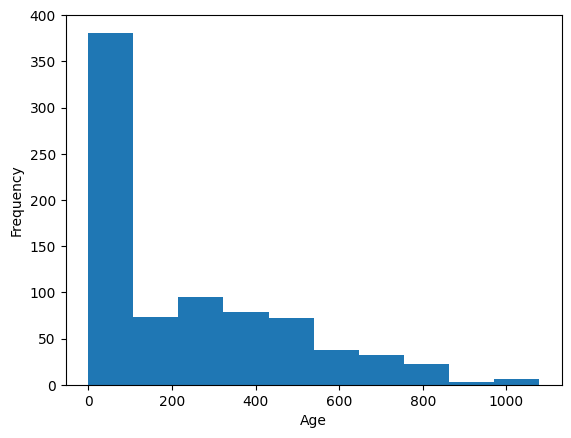

In [46]:
df["Age"].plot(kind = 'hist')
plt.xlabel("Age")

Text(0.5, 0, 'Days Since Last Payment')

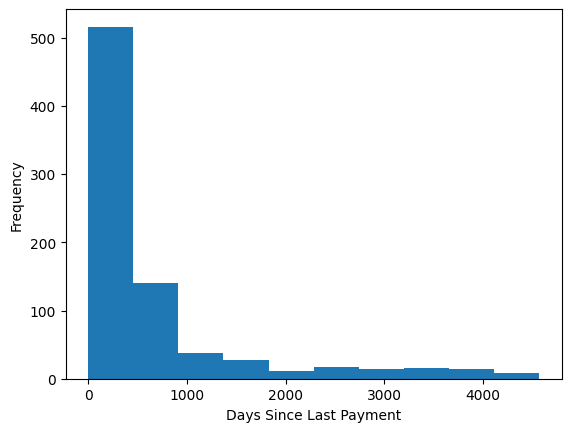

In [47]:
df["Days Since Last Payment"].plot(kind = "hist", bins = 10)
plt.xlabel("Days Since Last Payment")

Text(0.5, 0, 'Credit Limit')

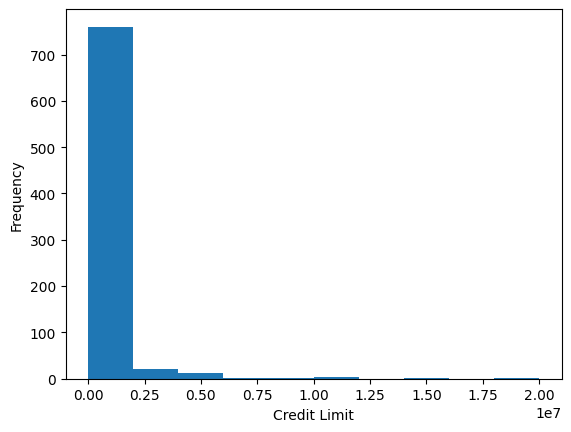

In [48]:
df["Credit Limit"].plot(kind = "hist")
plt.xlabel("Credit Limit")

Text(0.5, 0, 'Amnt of last payment')

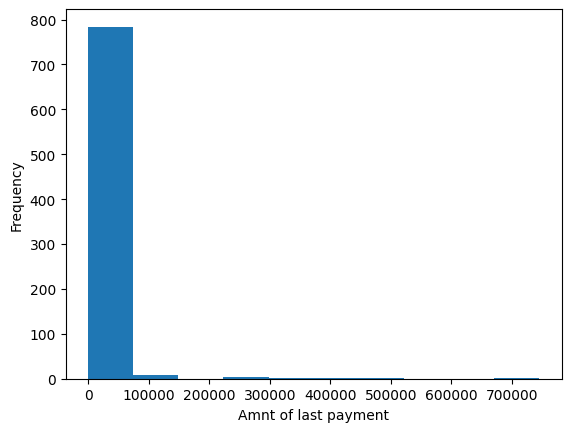

In [49]:
df["Amnt of last payment"].plot(kind = "hist", bins = 10)
plt.xlabel("Amnt of last payment")

<Axes: xlabel='Total receivables', ylabel='Credit Limit'>

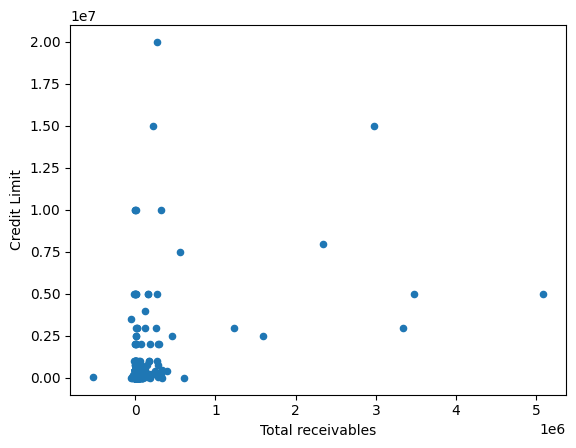

In [50]:
df.plot(kind = 'scatter', x = "Total receivables", y = "Credit Limit")

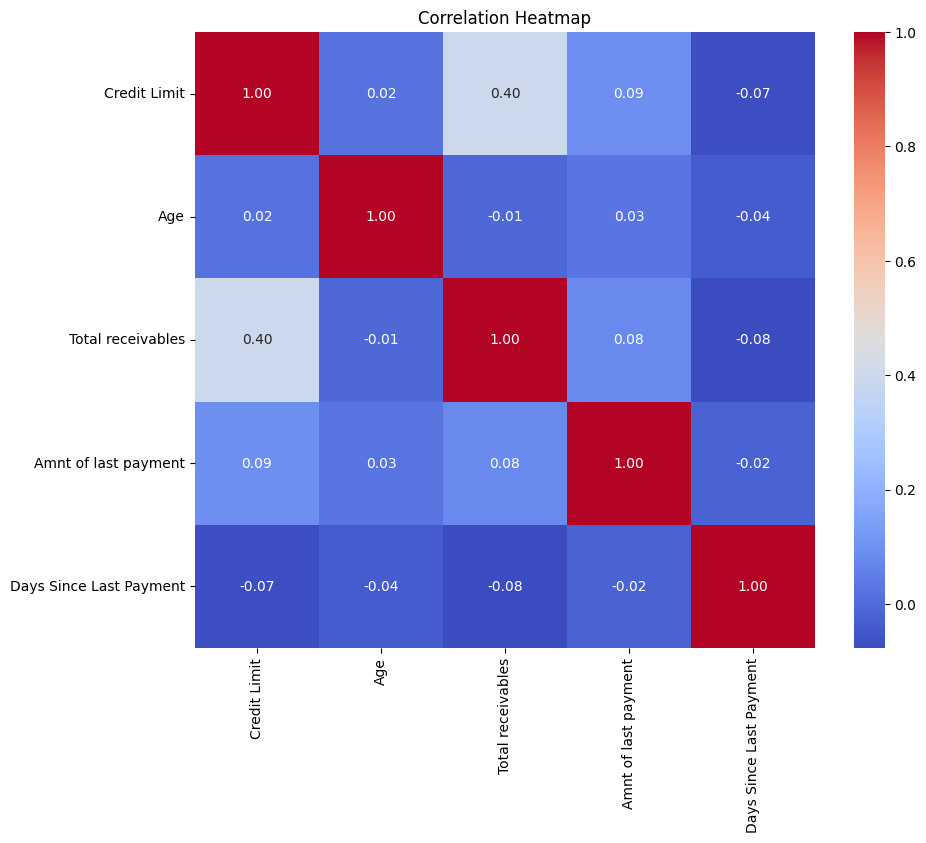

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##Milestone 8 - Creating the model

The Milestone we have all been waiting for! Lets train the models and test the models that way we can make sure that we can allow customers to receive the right credit.

In [52]:
df.head(20)

,Credit Limit,Age,Total receivables,Amnt of last payment,Days Since Last Payment
Customer Number,,,,,
1008172,0.01,841,5832.00,792.00,390
1012001,5000.00,792,676.00,0.00,656
1012226,1.00,843,3978.00,2383.72,746
1003119,25000.00,841,3879.32,20.00,3032
1008886,100000.00,732,3200.00,12548.76,2262
1012104,5000.00,724,-2195.00,1310.00,291
1011000,5000.00,702,4299.14,0.00,231
1000432,100000.00,631,2408.41,5098.78,951
1010786,1.00,554,2348.00,152.00,169


Every customer needs at least 2000 to do business and no customer will receive a maximum of 500000. The column correct will be -1, 0, or 1. -1 means unmodified, 0 means incorrect credit limit, 1 means correct credit Limit.

In [53]:
df.loc[df["Credit Limit"] < 2000, "Credit Limit"] = 2000
df.loc[df["Credit Limit"] > 500000, "Credit Limit"] = 500000
df["Correct"] = -1
df.head(20)

,Credit Limit,Age,Total receivables,Amnt of last payment,Days Since Last Payment,Correct
Customer Number,,,,,,
1008172,2000.0,841,5832.00,792.00,390,-1
1012001,5000.0,792,676.00,0.00,656,-1
1012226,2000.0,843,3978.00,2383.72,746,-1
1003119,25000.0,841,3879.32,20.00,3032,-1
1008886,100000.0,732,3200.00,12548.76,2262,-1
1012104,5000.0,724,-2195.00,1310.00,291,-1
1011000,5000.0,702,4299.14,0.00,231,-1
1000432,100000.0,631,2408.41,5098.78,951,-1
1010786,2000.0,554,2348.00,152.00,169,-1


This varies so we can locate the customers.

In [54]:
df.iloc[530]#iloc 429
#df[df["Credit Limit"]>100000].head(40)

,1007981
Credit Limit,200000.00
Age,12.00
Total receivables,1466.94
Amnt of last payment,0.00
Days Since Last Payment,172.00
Correct,-1.00


A value of 0 or 1 will be assigned as to whether the customer has a reasonable credit limit. 0 is no and 1 is yes.

In [55]:
df.loc["1008172", "Correct"] = 0
df.loc["1012001", "Correct"] = 0
df.loc["1012226", "Correct"] = 0
df.loc["1003119", "Correct"] = 0
df.loc["1012757", "Correct"] = 1
df.loc["1008886", "Correct"] = 0
df.loc["1012104", "Correct"] = 0
df.loc["1011000", "Correct"] = 1
df.loc["1000432", "Correct"] = 0
df.loc["1010786", "Correct"] = 0
df.loc["1006658", "Correct"] = 0
df.loc["1002859", "Correct"] = 0
df.loc["1013130", "Correct"] = 1
df.loc["1011968", "Correct"] = 0
df.loc["1001248", "Correct"] = 0
df.loc["1003066", "Correct"] = 0
df.loc["1000510", "Correct"] = 0
df.loc["1001186", "Correct"] = 0
df.loc["1012779", "Correct"] = 0
df.loc["1011960", "Correct"] = 0
df.loc["1000775", "Correct"] = 0
df.loc["1009142", "Correct"] = 0
df.loc["1003422", "Correct"] = 0
df.loc["1012087", "Correct"] = 0
df.loc["1012528", "Correct"] = 1
df.loc["1000093", "Correct"] = 0
df.loc["1013172", "Correct"] = 0
df.loc["1004247", "Correct"] = 0
df.loc["1012220", "Correct"] = 0
df.loc["1005324", "Correct"] = 1
df.loc["1002190", "Correct"] = 0
df.loc["1000808", "Correct"] = 1
df.loc["1013160", "Correct"] = 0
df.loc["1009463", "Correct"] = 0
df.loc["1000197", "Correct"] = 0
df.loc["1006777", "Correct"] = 0
df.loc["1003554", "Correct"] = 0
df.loc["1003650", "Correct"] = 0
df.loc["1012041", "Correct"] = 1
df.loc["1013243", "Correct"] = 0
df.loc["1001842", "Correct"] = 0
df.loc["1002329", "Correct"] = 0
df.loc["1009885", "Correct"] = 1
df.loc["1010480", "Correct"] = 0
df.loc["1003466", "Correct"] = 0
df.loc["1005725", "Correct"] = 0
df.loc["1013320", "Correct"] = 0
df.loc["1011195", "Correct"] = 0
df.loc["1006199", "Correct"] = 0
df.loc["1011701", "Correct"] = 0
df.loc["1012436", "Correct"] = 0
df.loc["1009796", "Correct"] = 0
df.loc["1002881", "Correct"] = 0
df.loc["1001140", "Correct"] = 0
df.loc["1003382", "Correct"] = 0
df.loc["1000550", "Correct"] = 0
df.loc["1001852", "Correct"] = 0
df.loc["1004841", "Correct"] = 0
df.loc["1004542", "Correct"] = 0
df.loc["1003776", "Correct"] = 0
df.loc["1004747", "Correct"] = 0
df.loc["1007095", "Correct"] = 0
df.loc["1010022", "Correct"] = 0

df.loc["1002916", "Correct"] = 0
df.loc["1004893", "Correct"] = 0
df.loc["1010637", "Correct"] = 1
df.loc["1003795", "Correct"] = 0
df.loc["1000831", "Correct"] = 0
df.loc["1000472", "Correct"] = 1
df.loc["1002929", "Correct"] = 1
df.loc["1010761", "Correct"] = 1
df.loc["1009625", "Correct"] = 0
df.loc["1000263", "Correct"] = 0
df.loc["1009660", "Correct"] = 0
df.loc["1001777", "Correct"] = 1
df.loc["1003186", "Correct"] = 0
df.loc["1010805", "Correct"] = 0
df.loc["1003970", "Correct"] = 0
df.loc["1008720", "Correct"] = 0
df.loc["1000796", "Correct"] = 0
df.loc["1011109", "Correct"] = 0
df.loc["1013244", "Correct"] = 0
df.loc["1007981", "Correct"] = 0





print(len(df[df["Correct"]==1]))
print(len(df[df["Correct"]==0]))

14
71


In [56]:
train_model = df[df["Correct"]!=-1]
X = train_model[["Age", "Total receivables", "Amnt of last payment", "Days Since Last Payment", "Credit Limit"]]
y = train_model[["Correct"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
#Initializes and fits the logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

#Predicts and evaluates
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 52.94117647058824


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC: 0.42857142857142855


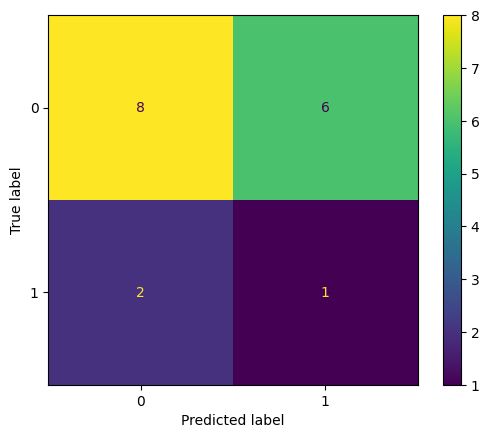

In [57]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = [0, 1])

cm_display.plot()

print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

While this model predicts is 82% accurate, it doesn't truly predict a correct Credit Limit. Let's try something better: Let's try to use something other than intuition.

In [58]:
df.drop("Correct", axis=1,inplace=True)

In [59]:
df.head(30)

,Credit Limit,Age,Total receivables,Amnt of last payment,Days Since Last Payment
Customer Number,,,,,
1008172,2000.0,841,5832.00,792.00,390
1012001,5000.0,792,676.00,0.00,656
1012226,2000.0,843,3978.00,2383.72,746
1003119,25000.0,841,3879.32,20.00,3032
1008886,100000.0,732,3200.00,12548.76,2262
1012104,5000.0,724,-2195.00,1310.00,291
1011000,5000.0,702,4299.14,0.00,231
1000432,100000.0,631,2408.41,5098.78,951
1010786,2000.0,554,2348.00,152.00,169


Lets try making a regression model

In [60]:
def recommended_correct_limit(row):
  cap_value = 500000

  receivables=row['Total receivables']
  last_payment = row["Amnt of last payment"]
  delay = row["Days Since Last Payment"]
  age=row["Age"]

  if receivables>10000:
    cap_value= 10000
  elif receivables>3000:
    cap_value=25000
  elif receivables>1000:
    cap_value = 50000
  elif receivables>100:
    cap_value=250000



  if last_payment/receivables<.1 or age>90:
    delay_penalty = .1*receivables
  else:
    delay_penalty=0

  payment_bonus = last_payment*.2
  base = 2000
  loyalty_bonus = (age/730)*500

  limit = min(base + payment_bonus+loyalty_bonus-delay_penalty, cap_value)

  return limit

df['Ideal Credit Limit'] = df.apply(recommended_correct_limit, axis=1)

/tmp/ipython-input-60-3337548542.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  if last_payment/receivables<.1 or age>90:


Let's see if this linear regression model is capable of giving the correct Credit Limit

In [61]:
X = df[["Age", "Total receivables", "Amnt of last payment", "Days Since Last Payment"]]
y = df["Ideal Credit Limit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Initializes and fits the logistic regression model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Mean Squared Error: 2213901.088506383
R²: 0.9974606113698619


##Model Works!!! Better than the old model! However, every Ideal Credit Limit has to be greater than 2000

In [62]:
def recommended_correct_limit(row):
  cap_value = 500000

  receivables=row['Total receivables']
  last_payment = row["Amnt of last payment"]
  delay = row["Days Since Last Payment"]
  age=row["Age"]

  if receivables>10000:
    cap_value= 10000
  elif receivables>3000:
    cap_value=25000
  elif receivables>1000:
    cap_value = 50000
  elif receivables>100:
    cap_value=250000



  if last_payment/receivables<.1 or age>90:
    delay_penalty = .1*receivables
  else:
    delay_penalty=0

  payment_bonus = last_payment*.2
  base = 2000
  loyalty_bonus = (age/730)*500

  limit = min(base + payment_bonus+loyalty_bonus-delay_penalty, cap_value)
  limit = max(2000, limit)# New Code here

  return limit

df['Ideal Credit Limit'] = df.apply(recommended_correct_limit, axis=1)

/tmp/ipython-input-62-1373992264.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  if last_payment/receivables<.1 or age>90:


In [63]:
X = df[["Age", "Total receivables", "Amnt of last payment", "Days Since Last Payment"]]
y = df["Ideal Credit Limit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Initializes and fits the logistic regression model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Mean Squared Error: 1555678.0867725967
R²: 0.46530657366437045


######This Model is preferred. A lower R^2 is due to the condition of the limit needing to be greater than 2000. We finally made the correct ML model!

#We finished!